# Student grades prediction

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [2]:
!pip install imbalanced-learn

In [3]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv',sep=',')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
# Remove missing values
df.dropna(inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   417 non-null    object 
 1   PH-121     417 non-null    object 
 2   HS-101     417 non-null    object 
 3   CY-105     417 non-null    object 
 4   HS-105/12  417 non-null    object 
 5   MT-111     417 non-null    object 
 6   CS-105     417 non-null    object 
 7   CS-106     417 non-null    object 
 8   EL-102     417 non-null    object 
 9   EE-119     417 non-null    object 
 10  ME-107     417 non-null    object 
 11  CS-107     417 non-null    object 
 12  HS-205/20  417 non-null    object 
 13  MT-222     417 non-null    object 
 14  EE-222     417 non-null    object 
 15  MT-224     417 non-null    object 
 16  CS-210     417 non-null    object 
 17  CS-211     417 non-null    object 
 18  CS-203     417 non-null    object 
 19  CS-214     417 non-null    object 
 20  EE-217    

In [7]:
grades = [('A+', 4.0), ('A', 4.0), ('A-', 3.7), ('B+',3.3), ('B',3.0), ('B-',2.7), ('C+',2.3), ('C',2.0),
          ('C-',1.7),('D+',1.3),('D',1.0),('D-',0.7),('F',0.0)]

In [8]:
#First year grades of the student in gpa form

df['First_year'] = df['PH-121'].map(dict(grades))
df['First_year'] = df['HS-101'].map(dict(grades))
df['First_year'] = df['CY-105'].map(dict(grades))
df['First_year'] = df['HS-105/12'].map(dict(grades))
df['First_year']  = df['MT-111'].map(dict(grades))
df['First_year']= df['CS-105'].map(dict(grades))
df['First_year']= df['CS-106'].map(dict(grades))
df['First_year']= df['EL-102'].map(dict(grades))
df['First_year']= df['EE-119'].map(dict(grades))
df['First_year']= df['ME-107'].map(dict(grades))
df['First_year']= df['CS-107'].map(dict(grades))

df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,First_year
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,A-,A,C-,B,A-,2.205,1.7
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D,C,D,A-,B-,C,C,B,2.008,3.3
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,A,C,A,A,A,A-,A,3.608,2.7
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,C,D+,C-,B-,B,C+,C+,C+,1.906,1.0
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B+,B+,B-,A-,A,A-,A-,A,3.448,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A,A,A,B+,B+,B,A,3.798,4.0
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,A,A,A-,B,A-,C,A-,3.772,4.0
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,B,A,B+,A,C,B+,A-,A-,3.470,4.0
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,B,B,C-,D,C,B,B-,C,2.193,4.0


In [9]:
#second year grades of the student in gpa form

df['Second_year']= df['HS-205/20'].map(dict(grades))
df['Second_year']= df['MT-222'].map(dict(grades))
df['Second_year']= df['EE-222'].map(dict(grades))
df['Second_year']= df['MT-224'].map(dict(grades))
df['Second_year']= df['CS-210'].map(dict(grades))
df['Second_year']= df['CS-211'].map(dict(grades))
df['Second_year']= df['CS-203'].map(dict(grades))
df['Second_year']= df['CS-214'].map(dict(grades))
df['Second_year']= df['EE-217'].map(dict(grades))
df['Second_year']= df['CS-212'].map(dict(grades))
df['Second_year']= df['CS-215'].map(dict(grades))
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,First_year,Second_year
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,A-,A,C-,B,A-,2.205,1.7,1.7
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,C,D,A-,B-,C,C,B,2.008,3.3,1.0
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A,C,A,A,A,A-,A,3.608,2.7,4.0
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C-,B-,B,C+,C+,C+,1.906,1.0,1.0
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B+,B-,A-,A,A-,A-,A,3.448,2.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A,A,A,B+,B+,B,A,3.798,4.0,3.7
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A,A,A-,B,A-,C,A-,3.772,4.0,3.0
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A,B+,A,C,B+,A-,A-,3.470,4.0,3.0
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,B,C-,D,C,B,B-,C,2.193,4.0,1.3


In [10]:
#Third year grades of the students with gpa 

df['Third_year']= df['MT-331'].map(dict(grades))
df['Third_year']= df['EF-303'].map(dict(grades))
df['Third_year']= df['HS-304'].map(dict(grades))
df['Third_year']= df['CS-301'].map(dict(grades))
df['Third_year']= df['CS-302'].map(dict(grades))
df['Third_year']= df['TC-383'].map(dict(grades))
df['Third_year']= df['EL-332'].map(dict(grades))
df['Third_year']= df['CS-318'].map(dict(grades))
df['Third_year']= df['CS-306'].map(dict(grades))
df['Third_year']= df['CS-312'].map(dict(grades))
df['Third_year']= df['CS-317'].map(dict(grades))

df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,First_year,Second_year,Third_year
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,A-,A,C-,B,A-,2.205,1.7,1.7,1.7
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D,A-,B-,C,C,B,2.008,3.3,1.0,1.0
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,C,A,A,A,A-,A,3.608,2.7,4.0,3.0
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,C-,B-,B,C+,C+,C+,1.906,1.0,1.0,2.0
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,A-,A,A-,A-,A,3.448,2.0,3.7,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A,A,B+,B+,B,A,3.798,4.0,3.7,3.7
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A,A-,B,A-,C,A-,3.772,4.0,3.0,3.3
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,B+,A,C,B+,A-,A-,3.470,4.0,3.0,3.0
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,C-,D,C,B,B-,C,2.193,4.0,1.3,3.0


In [16]:
#Fourth year grades of the student with gpa

df['Four_year']= df['CS-403'].map(dict(grades))
df['Four_year']= df['CS-421'].map(dict(grades))
df['Four_year']= df['CS-406'].map(dict(grades))
df['Four_year']= df['CS-414'].map(dict(grades))
df['Four_year']= df['CS-419'].map(dict(grades))
df['Four_year']= df['CS-423'].map(dict(grades))
df['Four_year']= df['CS-412'].map(dict(grades))
df['Four_year']= df['MT-442'].map(dict(grades))

df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,First_year,Second_year,Third_year,Four_year
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,A-,A,C-,B,A-,2.205,1.7,1.7,1.7,3.3
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,A-,B-,C,C,B,2.008,3.3,1.0,1.0,1.7
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A,A,A,A-,A,3.608,2.7,4.0,3.0,4.0
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,B-,B,C+,C+,C+,1.906,1.0,1.0,2.0,1.7
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,A-,A,A-,A-,A,3.448,2.0,3.7,3.3,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A,B+,B+,B,A,3.798,4.0,3.7,3.7,4.0
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A-,B,A-,C,A-,3.772,4.0,3.0,3.3,4.0
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A,C,B+,A-,A-,3.470,4.0,3.0,3.0,3.3
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,C,B,B-,C,2.193,4.0,1.3,3.0,1.7


# Exploratory Data Analysis

In [17]:
df.describe

<bound method NDFrame.describe of      Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-406 CS-414 CS-419 CS-423 CS-412   

# Grades of Students 
grades set according to gpa of students 
('A+', 4.0)
('A', 4.0)
('A-', 3.7)
('B+',3.3)
('B',3.0)
('B-',2.7)
('C+',2.3)
('C',2.0)
('C-',1.7)
('D+',1.3)
('D',1.0)
('D-',0.7)
('F',0.0)

Predict - CGPA of a student based on different grades in four years.


In [18]:
df.shape

(417, 47)

In [19]:
#create new dataframe to collect all the four years grades

df1=pd.DataFrame(df)

In [20]:
#We create a new data frame for four years gpa of the students 

df1= df.loc[:, ['First_year', 'Second_year','Third_year','Four_year','CGPA']]


In [21]:
#Fill in na values with mean 

df1.fillna(df1.mean(),inplace=True)
df1

,First_year,Second_year,Third_year,Four_year,CGPA
0,1.7,1.7,1.7,3.3,2.205
1,3.3,1.0,1.0,1.7,2.008
2,2.7,4.0,3.0,4.0,3.608
3,1.0,1.0,2.0,1.7,1.906
4,2.0,3.7,3.3,3.7,3.448
...,...,...,...,...,...
566,4.0,3.7,3.7,4.0,3.798
567,4.0,3.0,3.3,4.0,3.772
568,4.0,3.0,3.0,3.3,3.470
569,4.0,1.3,3.0,1.7,2.193


In [22]:
df1.isnull().sum()

First_year     0
Second_year    0
Third_year     0
Four_year      0
CGPA           0
dtype: int64

In [23]:
df1['New_CGPA']=(df1['First_year'] + df1['Second_year'] + df1['Third_year'] + df1['Four_year']) / 4

In [24]:
df1

,First_year,Second_year,Third_year,Four_year,CGPA,New_CGPA
0,1.7,1.7,1.7,3.3,2.205,2.100
1,3.3,1.0,1.0,1.7,2.008,1.750
2,2.7,4.0,3.0,4.0,3.608,3.425
3,1.0,1.0,2.0,1.7,1.906,1.425
4,2.0,3.7,3.3,3.7,3.448,3.175
...,...,...,...,...,...,...
566,4.0,3.7,3.7,4.0,3.798,3.850
567,4.0,3.0,3.3,4.0,3.772,3.575
568,4.0,3.0,3.0,3.3,3.470,3.325
569,4.0,1.3,3.0,1.7,2.193,2.500


<AxesSubplot:>

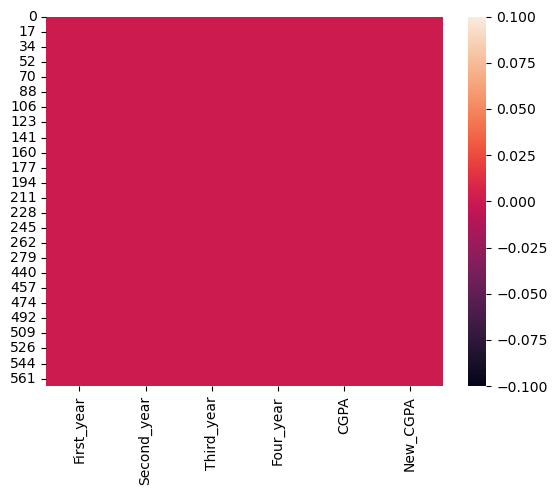

In [25]:
#lets visualize it using heatmap
sns.heatmap(df1.isnull())

In [26]:
df1['New_CGPA']=df1['New_CGPA'].astype(float).round(2)

In [27]:
df1['New_CGPA'].unique()

array([2.1 , 1.75, 3.42, 1.42, 3.18, 2.6 , 2.68, 3.08, 3.25, 2.92, 2.42,
       3.45, 1.25, 3.6 , 3.58, 1.82, 2.75, 3.03, 3.35, 3.32, 1.65, 2.  ,
       3.5 , 3.  , 2.85, 2.9 , 2.82, 2.7 , 2.33, 3.92, 3.68, 2.25, 3.1 ,
       2.65, 2.08, 2.03, 3.85, 3.28, 2.53, 1.72, 1.32, 4.  , 1.85, 3.82,
       3.75, 2.78, 1.58, 1.92, 1.68, 2.4 , 2.35, 2.58, 2.17, 1.5 , 1.6 ,
       3.78, 3.2 , 2.5 , 2.18, 2.95, 2.45, 1.8 , 2.47, 3.53, 2.15, 3.65,
       2.3 , 3.22, 1.18, 1.98, 3.15, 2.97, 2.8 ])

In [28]:
df1.shape

(417, 6)

In [29]:
df1.columns.tolist()


['First_year', 'Second_year', 'Third_year', 'Four_year', 'CGPA', 'New_CGPA']

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 570
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   First_year   417 non-null    float64
 1   Second_year  417 non-null    float64
 2   Third_year   417 non-null    float64
 3   Four_year    417 non-null    float64
 4   CGPA         417 non-null    float64
 5   New_CGPA     417 non-null    float64
dtypes: float64(6)
memory usage: 22.8 KB


In [31]:
grouped_data= df1.groupby('New_CGPA')
print(grouped_data.mean())

          First_year  Second_year  Third_year  Four_year      CGPA
New_CGPA                                                          
1.18        1.700000     2.000000    0.000000   1.000000  1.886000
1.25        1.000000     1.500000    0.650000   1.850000  1.855000
1.32        1.650000     1.000000    1.350000   1.300000  1.923500
1.42        1.116667     1.333333    1.500000   1.750000  2.032333
1.50        1.766667     1.100000    1.900000   1.233333  1.941000
...              ...          ...         ...        ...       ...
3.78        3.940000     3.700000    3.700000   3.760000  3.543000
3.82        3.766667     3.883333    3.650000   4.000000  3.719500
3.85        3.871429     3.764286    3.828571   3.935714  3.707714
3.92        3.940000     3.900000    3.920000   3.940000  3.792533
4.00        4.000000     4.000000    4.000000   4.000000  3.889235

[73 rows x 5 columns]


In [32]:
df1.describe().round(2)

,First_year,Second_year,Third_year,Four_year,CGPA,New_CGPA
count,417.00,417.00,417.00,417.00,417.00,417.00
mean,3.02,2.78,2.70,3.33,2.99,2.96
std,0.98,0.94,0.88,0.78,0.58,0.69
min,1.00,1.00,0.00,1.00,1.71,1.18
25%,2.30,2.00,2.00,3.00,2.60,2.50
50%,3.30,3.00,2.70,3.70,3.03,3.03
75%,4.00,3.70,3.30,4.00,3.45,3.50
max,4.00,4.00,4.00,4.00,3.98,4.00


This gives the statistical information of the numerical columns. 

From the above description we can observe the following:

The counts of all the columns are same which means there are no missing values in the data set.

The mean value is lower than the median(50%) New_CGPA column which means the data is skewed to left in these column.

By summarizing the data we can observe there is a differences between 75% and max hence there are outliers present in the data

We can also notice the Standard deviation, min 25% values from the described method.

# Data Visualization 


3.18    18
4.00    17
3.42    16
3.25    16
2.68    15
        ..
2.18     1
2.35     1
2.70     1
1.72     1
2.80     1
Name: New_CGPA, Length: 73, dtype: int64


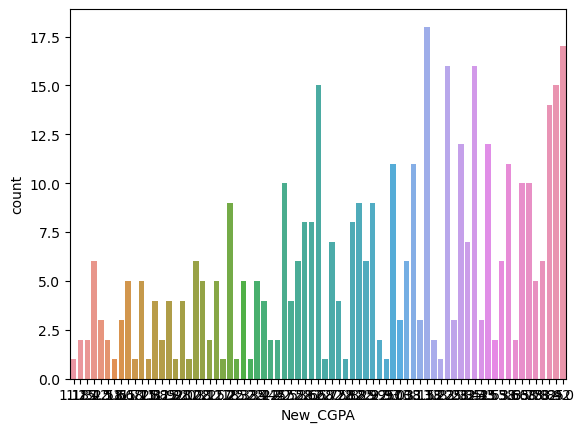

In [33]:
#visualize the number of gpa in the column new_cgpa

ax=sns.countplot(x= 'New_CGPA',data=df1)
print(df1['New_CGPA'].value_counts())

In [34]:
# we will drop the CGPA column since it gives us different 

df1.drop('CGPA',axis=1, inplace=True)

In [35]:
df1

,First_year,Second_year,Third_year,Four_year,New_CGPA
0,1.7,1.7,1.7,3.3,2.10
1,3.3,1.0,1.0,1.7,1.75
2,2.7,4.0,3.0,4.0,3.42
3,1.0,1.0,2.0,1.7,1.42
4,2.0,3.7,3.3,3.7,3.18
...,...,...,...,...,...
566,4.0,3.7,3.7,4.0,3.85
567,4.0,3.0,3.3,4.0,3.58
568,4.0,3.0,3.0,3.3,3.32
569,4.0,1.3,3.0,1.7,2.50


In [36]:
df1.columns = df1.columns.str.strip()
df1

,First_year,Second_year,Third_year,Four_year,New_CGPA
0,1.7,1.7,1.7,3.3,2.10
1,3.3,1.0,1.0,1.7,1.75
2,2.7,4.0,3.0,4.0,3.42
3,1.0,1.0,2.0,1.7,1.42
4,2.0,3.7,3.3,3.7,3.18
...,...,...,...,...,...
566,4.0,3.7,3.7,4.0,3.85
567,4.0,3.0,3.3,4.0,3.58
568,4.0,3.0,3.0,3.3,3.32
569,4.0,1.3,3.0,1.7,2.50


# Correlation between target variable and independent variables

In [77]:
df1.corr()

,First_year,Second_year,Third_year,Four_year,New_CGPA
First_year,1.000000,0.378452,0.382945,0.333811,0.698836
Second_year,0.378452,1.000000,0.617868,0.520868,0.816469
Third_year,0.382945,0.617868,1.000000,0.566385,0.822615
Four_year,0.333811,0.520868,0.566385,1.000000,0.757831
New_CGPA,0.698836,0.816469,0.822615,0.757831,1.000000


In [78]:
print("Min. GPA :",df1["New_CGPA"].min())
print("Max. GPA :",df1["New_CGPA"].max())

Min. GPA : 1.18
Max. GPA : 4.0


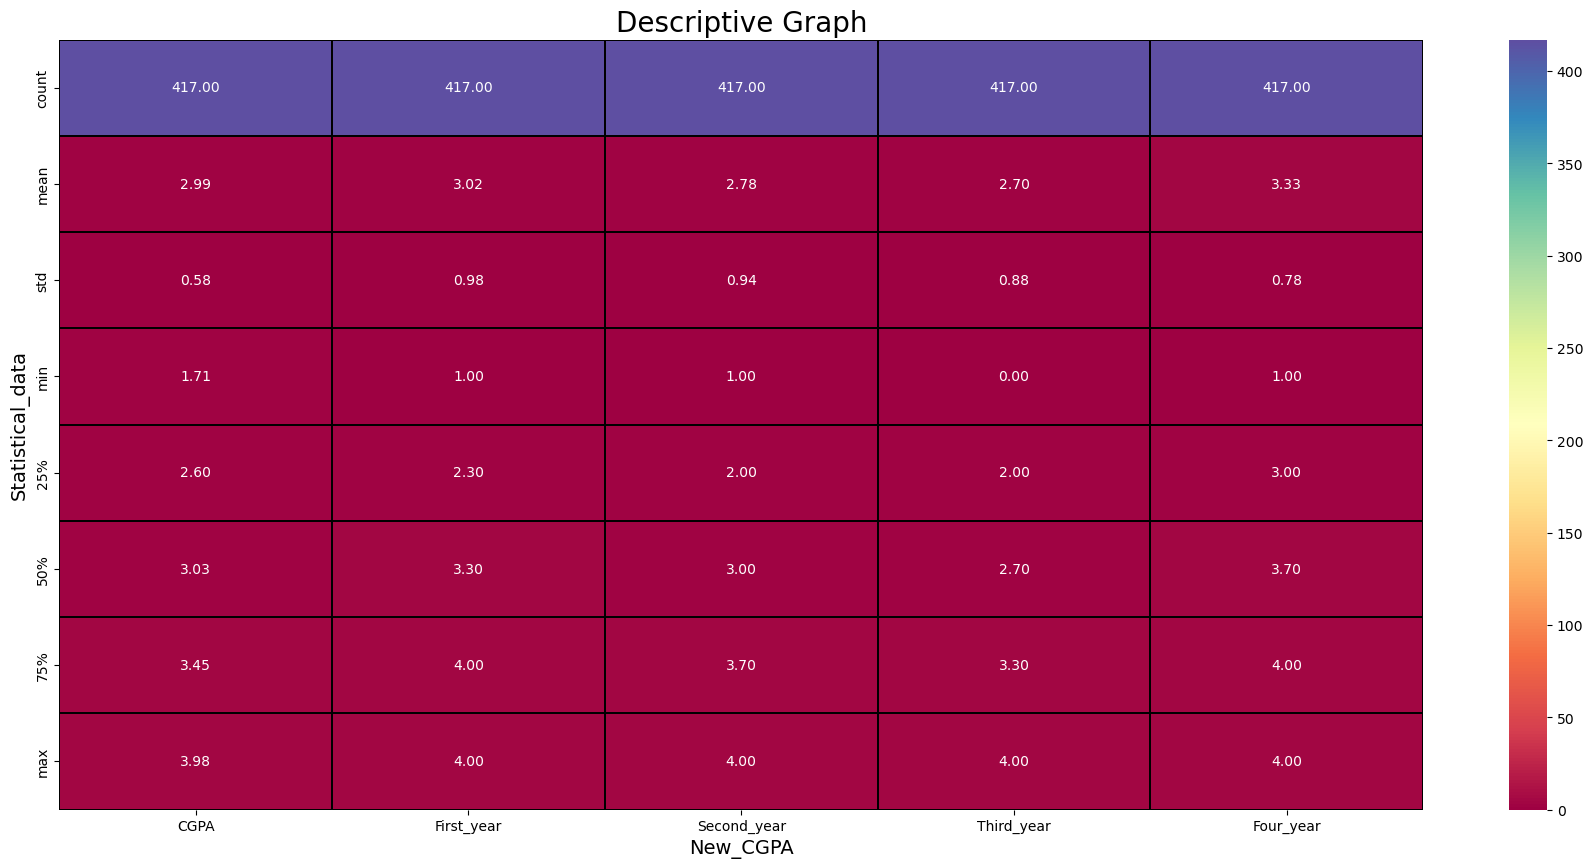

In [79]:
#correlation in heatmap of student gpa

plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('New_CGPA',fontsize=14)
plt.ylabel('Statistical_data',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

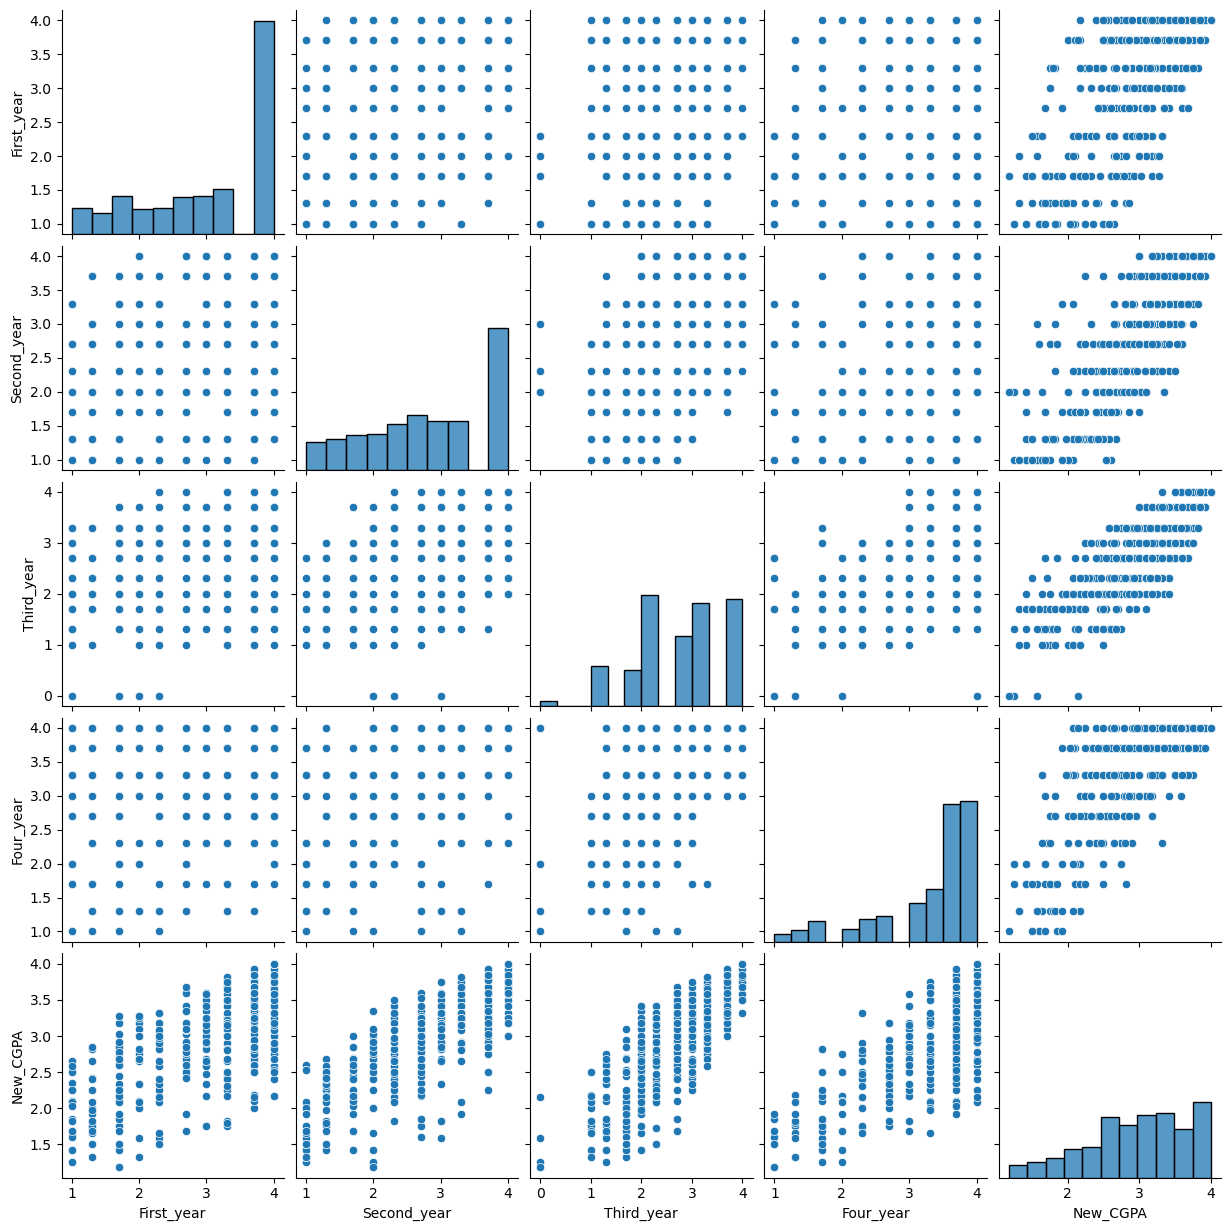

In [80]:
sns.pairplot(df1)

<AxesSubplot:>

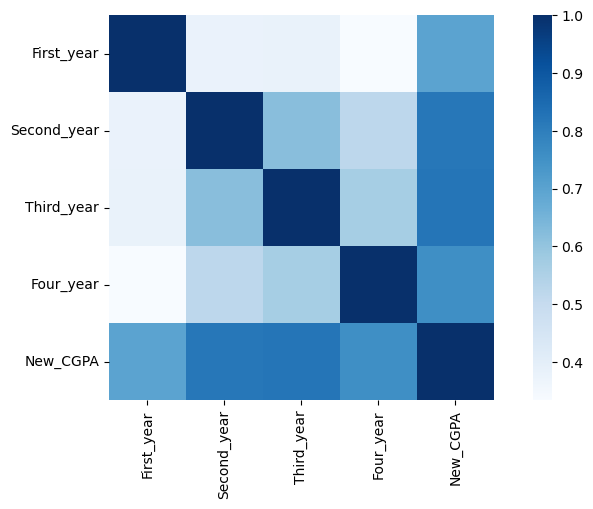

In [81]:
#Correlation Map

cor = df1.corr(method ="pearson")
f, ax=plt.subplots(figsize = (10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),
           cmap="Blues",square=True, ax= ax)

As per correlation graph we can see the strong points in dark blue and light colors with less correlation. GPA score is strong with Second and Third years of education.


# Checking for Outlier

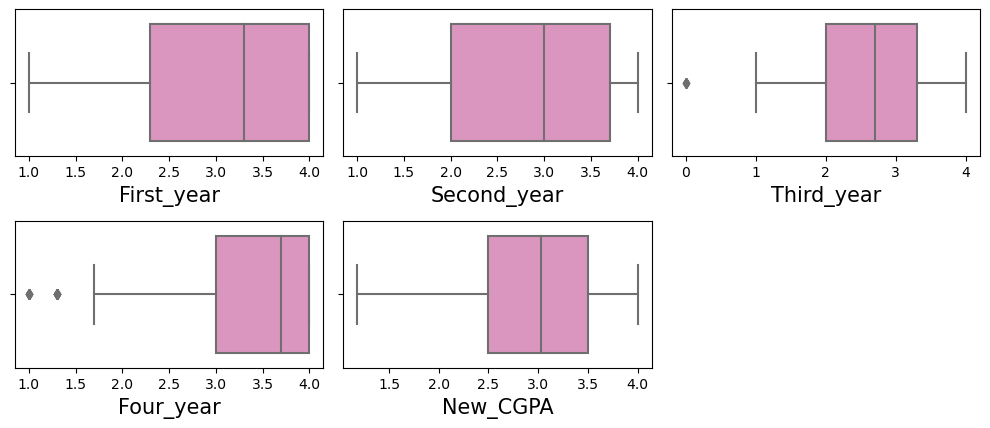

In [82]:
#lets check the outliers by plotting boxplot of categorical column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in df1:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [83]:
#Removing outliers using z-score

from scipy.stats import zscore
out_features=df1[['First_year','Second_year','Third_year','Four_year','New_CGPA']]
z=np.abs(zscore(out_features))
z


,First_year,Second_year,Third_year,Four_year,New_CGPA
0,1.354869,1.155460,1.139105,0.040300,1.245619
1,0.281273,1.904137,1.939357,2.092813,1.753520
2,0.332280,1.304477,0.347077,0.857675,0.669893
3,2.070681,1.904137,0.796140,2.092813,2.232398
4,1.048092,0.983616,0.690043,0.472829,0.321618
...,...,...,...,...,...
566,0.997085,0.983616,1.147329,0.857675,1.293886
567,0.997085,0.234939,0.690043,0.857675,0.902077
568,0.997085,0.234939,0.347077,0.040300,0.524779
569,0.997085,1.583275,0.347077,2.092813,0.665161


In [84]:
#threshold =3
np.where(z>3)

(array([303, 337, 364, 370], dtype=int64), array([2, 2, 2, 2], dtype=int64))

In [85]:
df2=df1[(z<3).all(axis=1)]
df2.shape

(413, 5)

In [86]:
#shape of old and new dataframe

print("old data frame",df1.shape[0])
print("new data frame",df2.shape[0])

old data frame 417
new data frame 413


In [87]:
print("Data loss percentage",((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data loss percentage 0.9592326139088728


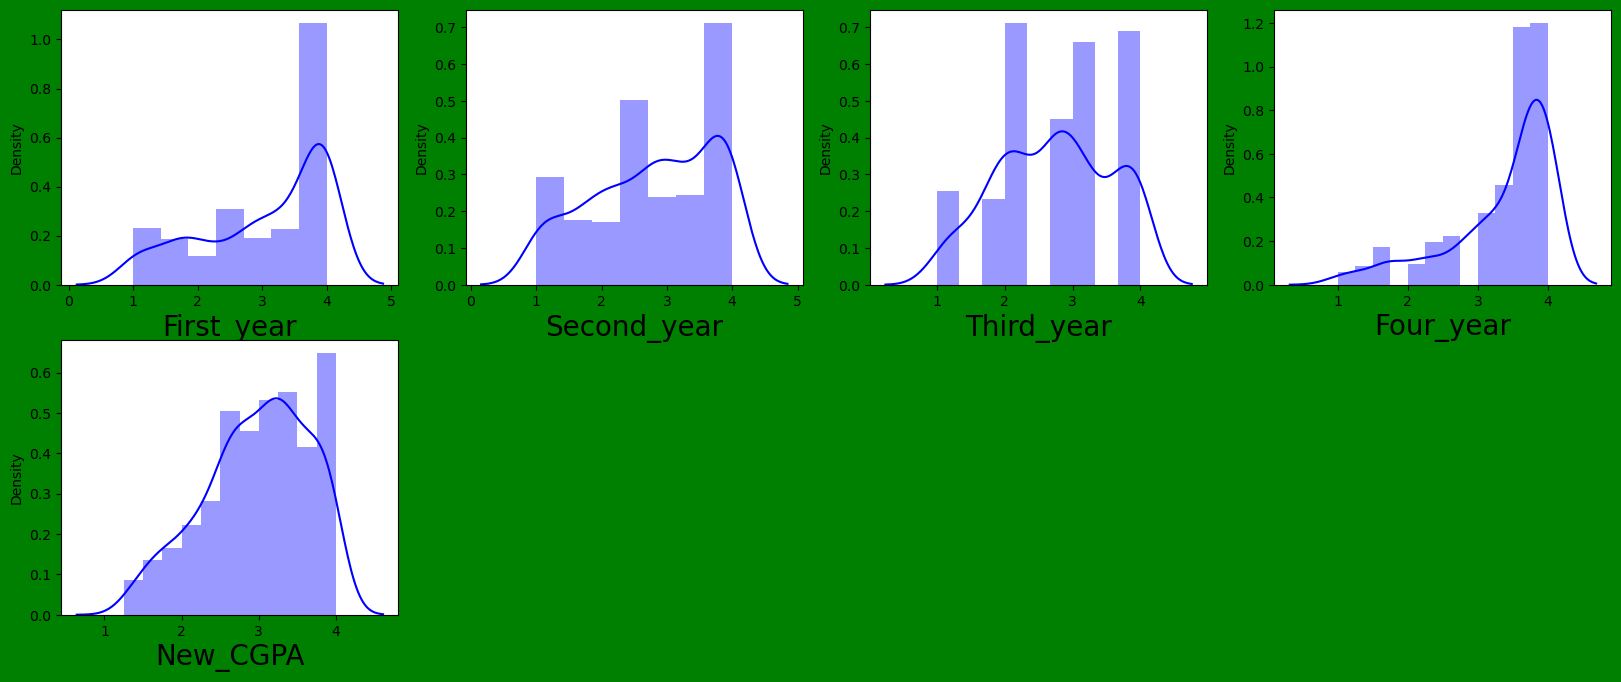

In [89]:
#Checking for skewness after removing outliers

plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df2:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [90]:
df2.skew()

First_year    -0.708915
Second_year   -0.358207
Third_year    -0.123600
Four_year     -1.346618
New_CGPA      -0.447372
dtype: float64

In [91]:
#removing skewness using cuberoot method

df2['First_year']=np.cbrt(df2['First_year'])
df2['Second_year']=np.cbrt(df2['Second_year'])
df2['Third_year']=np.cbrt(df2['Third_year'])

df2['Four_year']=np.cbrt(df2['Four_year'])
df2['New_CGPA']=np.cbrt(df2['New_CGPA'])

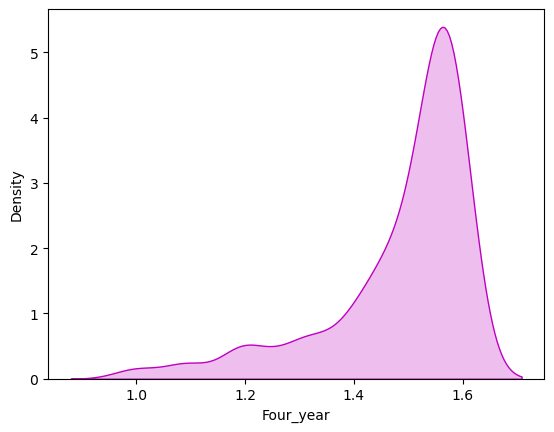

In [92]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['Four_year'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

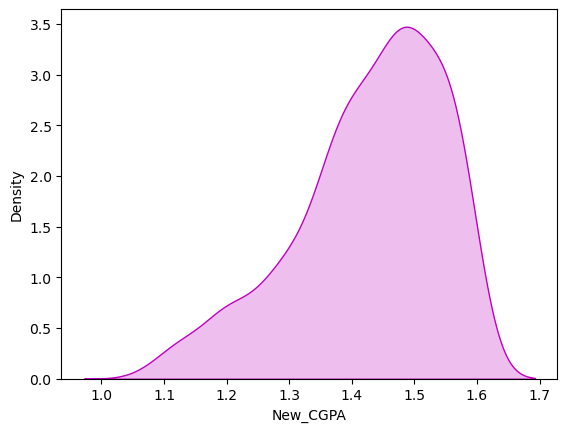

In [93]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['New_CGPA'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [94]:
df2.round(2)

,First_year,Second_year,Third_year,Four_year,New_CGPA
0,1.19,1.19,1.19,1.49,1.28
1,1.49,1.00,1.00,1.19,1.21
2,1.39,1.59,1.44,1.59,1.51
3,1.00,1.00,1.26,1.19,1.12
4,1.26,1.55,1.49,1.55,1.47
...,...,...,...,...,...
566,1.59,1.55,1.55,1.59,1.57
567,1.59,1.44,1.49,1.59,1.53
568,1.59,1.44,1.44,1.49,1.49
569,1.59,1.09,1.44,1.19,1.36


## Seperating features and label

In [95]:
#Seperating the independent and target variables into x and y assuming preprocessed dataframe called process_df2

x = df2.drop('New_CGPA',axis=1) #Feature
y = df2['New_CGPA'] #Target variable


print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (413, 4)
Label Dimension (413,)


In [96]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

y=y_transformed
#view transformed values
print(y)


[18  9 58  2 51 33 35 48 54 43 27 59 33 51 54 35 54  0 63 62 11 37 47 57
 56  6 58 15 51 18 60 46 57 41 35 42 37 57 18 56 48 40 36 46 24  2 70 65
 54 22 35 42 49 34 51 46  9 57 17 33 16 69 49 33 35 49 18 58 55 34 60 17
 56 35 49 51 41 63 37 24 65 22 40  2 31 49 22  8 15 69  1 70 70 40 71 22
 70 12 51 48 68 40  2 71 43  2 66 63  2 54 11 27 38 11 55  4 13  7 41 27
 65 26 15 43 46 17 35 38 22 25 41 32  7 20  3 55  5 71 70 63 35 67 58 66
 43 51 49 32 58 65 59 52 71 63 66 70 62 30 65 69 60 60 48 66 21 59 20 69
 60 37 58 44 56 41 30 70 46 42 63 17 32 38 26  1 34 71 70 30 69 54 60  9
 35 28 51 69 63 51 32 57 68 70 54  9 68 35 58 10 49 47  3 58 67 54 29 33
 37 58 58 67 34 52 37 24 40 69 54 60 69 51 20 57 66 66 49 31 65 61 31 58
 33 60 37 58 40 48 33 62 11 40 26 69 56 71 26 13 51 70 35 69 19 56 49 64
 60 54 38 43 30 28 44 23 30 67 46 70 71 54 35 56 22 22 58 42 61 69 70 43
 42 70 29 40 56  6 24  9  6 54 71 67 18 56 42 51 35 17 20 71 53 66 47 68
 63 62 46 15 22 65 56 46 70 34 34 51 49 30 26 51  7

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called 'df' with a continuous target variable 'CGPA'

# Define the bin edges or thresholds to discretize the continuous values
bin_edges = [0, 2, 3, 4, 5]  # Adjust the bin edges according to your requirements

# Perform binning or discretization
categories = pd.cut(df2['New_CGPA'], bins=bin_edges, labels=False)

# Convert the categories to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(categories)

# Creating Train and Test split

In [110]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RFC, ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [101]:
from sklearn.model_selection import train_test_split


In [106]:
#finding the best Random state, we are using logistic regression 

maxAcc = 0
maxRS = 0
for i in range(1,415):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is ",maxAcc, "at random_state",maxRS)

Max r2 score accuracy is  0.9933387546059569 at random_state 402


# Modeling

In [118]:
#Checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.22115384615384615
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00      

In [119]:
#checking accuracy of Logistic Regression

LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(r2_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.4188050651455856
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00       

In [114]:
#Checking accuracy for support vector machine classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(r2_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.9300971927373354
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       0.33      1.00      0.50         2
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00       

In [116]:
#checking accuracy for Bagging classifier

BC =BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(r2_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))


0.9047389089725242
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00       

# Cross Validation Score

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

In [120]:
from sklearn.model_selection import cross_val_score


cv=5--- it's a fold value  1, 2, 3, 4, 5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafulat scoring parameter is - r2 score


In [127]:
#Checking cv score for Random Forest Classifier

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predRFC)-score.mean())


[0.27710843 0.28915663 0.24096386 0.30487805 0.30487805]
0.2833970026447252
Difference between Accuracy score and cross validation score is - -0.06224315649087908


In [128]:
#Checking cv score for Logistic Regression

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predLR)-score.mean())


[0.09638554 0.09638554 0.07228916 0.08536585 0.08536585]
0.08715838965618573
Difference between Accuracy score and cross validation score is - -0.01985069734849343


In [129]:
#Checking cv score for Support Vector Machine Classifier

score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predsvc)-score.mean())


[0.1686747  0.18072289 0.1686747  0.15853659 0.17073171]
0.16946811636791068
Difference between Accuracy score and cross validation score is - 0.03245496055516625


In [130]:
#Checking cv score for Bagging Classifier
BC = BaggingClassifier()

score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predBC)-score.mean())


[0.28915663 0.28915663 0.25301205 0.32926829 0.2804878 ]
0.288216279753159
Difference between Accuracy score and cross validation score is - -0.06706243359931285


# Hyperparameter Tuning

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [132]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


{'C': 10, 'kernel': 'rbf'}


In [137]:
svc = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [138]:
Final_model = SVC(C=1.0, kernel='rbf')
Final_model.fit(x_train, y_train)
predictions = Final_model.predict(x_test)
predictions

#rf_model.predict_proba(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

98.8317952847108


Our SVC model give us the 98% accuracy thus we save the model now. 

#  saving the model


In [139]:
import joblib
joblib.dump(Final_model,"Student_gpa.pkl")

['Student_gpa.pkl']

# # Predicting the saved model

In [140]:
#Lets load the saved model and get the prediction

model = joblib.load("Student_gpa.pkl")

#Prediction
prediction = model.predict(x_test)
prediction


array([51, 51, 51, 70, 43, 58, 51, 51, 35, 51, 51, 58, 51, 22, 22, 70,  9,
       51, 35, 22, 70,  2,  3, 33, 31, 70, 70, 71, 58, 58, 51, 35, 51, 51,
       58, 65, 58, 35, 33, 31, 30, 51, 35, 30, 51, 51, 51, 33, 58, 51, 51,
       58, 30, 51, 33, 51, 51, 71, 51, 31, 22, 70, 58, 31, 35, 60, 70, 70,
       33, 35, 65, 51, 30, 65, 71, 51, 71, 70, 22, 51, 51, 22,  9, 20, 51,
       51, 51, 51, 58, 58, 58, 41, 33, 65, 71, 46, 51, 35, 30, 51, 70, 51,
       30, 65], dtype=int64)

In [141]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,51,56
1,51,50
2,51,43
3,70,70
4,43,35
...,...,...
99,51,56
100,70,66
101,51,54
102,30,29
